In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv('/content/drive/MyDrive/cleanapp.csv',engine='python',on_bad_lines='skip')

In [6]:
data.head()

,Unnamed: 0.1,Unnamed: 0,_id,title,description,summary,installs,minInstalls,realInstalls,score,...,released,updated,version,recentChanges,appId,url,minInApp,maxInApp,interaction,interac
0,0,0,63e523d7020a6c8cabe36d6d,FaLala Stickers for WhatsApp,FaLala stickers collection for WhatsApp. Desig...,FaLala stickers collection for WhatsApp. Desig...,"100,000+",100000.0,410741.0,4.757576,...,"Nov 1, 2018",1.662043e+09,1.39,New Sticker pack: FaLala Love,com.jpictures.falalawas,https://play.google.com/store/apps/details?id=...,0.99,NaN,47878.964438,3.0
1,1,1,63e523d7020a6c8cabe36d6e,Wutsapper-WhatsApp&WB Transfer,Transfer all your <b>WhatsApp & WhatsApp Busin...,Transfer/move your WhatsApp&WB messages data b...,"1,000,000+",1000000.0,3265143.0,4.907865,...,"Aug 16, 2020",1.668436e+09,4.1.3.620,Support for transferring WhatsApp contacts !,com.wondershare.wutsapper.android,https://play.google.com/store/apps/details?id=...,1.49,39.99,123050.609924,3.0
2,2,2,63e523d7020a6c8cabe36d6f,DeepL Translate,DeepL Translate is the go-to translation app f...,Translate into 29 languages with a fast and ac...,"1,000,000+",1000000.0,3280956.0,4.609091,...,"Jan 30, 2022",1.666686e+09,1.6,"More accessible and usable (one might say, eve...",com.deepl.mobiletranslator,https://play.google.com/store/apps/details?id=...,0.00,NaN,94723.162939,3.0
3,3,3,63e523d7020a6c8cabe36d70,Translate Me - Text & Voice Tr,<h2>TRANSLATE ME - The best FREE Translation T...,"Translate text, photo, voice, conversation for...","100,000+",100000.0,464715.0,4.188119,...,"May 24, 2019",1.607927e+09,2.2.4,Have you been waiting? Here is the latest upda...,com.simyasolutions.translate,https://play.google.com/store/apps/details?id=...,7.99,119.99,29638.354019,2.0
4,4,4,63e523d7020a6c8cabe36d71,Talking Translator,"<font color=""#0000ff""><b>The last translation ...","1-sec translation app made by a professor, sup...","1,000,000+",1000000.0,3377074.0,4.628743,...,"Jan 30, 2019",1.667180e+09,2.5.0,"·<b><font color=""#ff9100"">Talking Translator U...",com.translate.talkingtranslator,https://play.google.com/store/apps/details?id=...,2.99,39.99,95001.337476,3.0


In [7]:
data=data.dropna(subset=['score','ratings','reviews','realInstalls','price'])

In [29]:
d=data.copy()
d2=data.copy()

In [9]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,minInstalls,realInstalls,score,ratings,reviews,price,contentRating,updated,minInApp,maxInApp,interaction,interac
count,11593.000000,11593.00000,11593.000000,1.159300e+04,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,1.159300e+04,11593.000000,6835.000000,11592.000000,11592.000000
mean,5796.581213,5796.00000,317828.939964,6.703382e+05,4.155004,7552.007850,253.322263,0.419595,1.573708,1.636349e+09,1.974339,77.009778,31580.610991,1.500000
std,3347.176787,3346.75517,388772.421861,9.974195e+05,0.545113,13599.488687,383.681302,2.641986,1.093588,4.979075e+07,4.753919,70.698343,22771.364707,1.118082
min,0.000000,0.00000,1.000000,1.000000e+00,1.000000,6.000000,1.000000,0.000000,0.000000,1.317323e+09,0.000000,0.990000,0.000000,0.000000
25%,2898.000000,2898.00000,10000.000000,4.814100e+04,3.922601,407.000000,15.000000,0.000000,1.000000,1.625205e+09,0.000000,22.990000,13278.816633,0.750000
50%,5797.000000,5796.00000,100000.000000,2.234010e+05,4.279343,2113.000000,71.000000,0.000000,1.000000,1.660728e+09,0.990000,69.990000,26882.457261,1.500000
75%,8695.000000,8694.00000,500000.000000,8.246780e+05,4.530000,8250.000000,311.000000,0.000000,2.000000,1.666982e+09,1.990000,99.990000,45197.332123,2.250000
max,11593.000000,11592.00000,1000000.000000,4.997022e+06,5.000000,123406.000000,1809.000000,100.000000,5.000000,1.668883e+09,199.990000,400.000000,124266.904614,3.000000


# scaling


In [10]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data[['score','reviews','minInstalls','realInstalls','ratings','price']] = scaler.fit_transform(data[['score','reviews','minInstalls','realInstalls','ratings','price']])

In [11]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')
data[['score','reviews','minInstalls','realInstalls','ratings']] = scaler.fit_transform(data[['score','reviews','minInstalls','realInstalls','ratings']])

# feature engineering


In [12]:
#let's creat polynomial features:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3,interaction_only=True)
d=pf.fit_transform(data[['score','reviews','realInstalls','ratings']])

In [13]:
df_poly=pd.DataFrame(d)
df_poly.columns = pf.get_feature_names_out(data[['score','reviews','realInstalls','ratings']].columns)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features):

    X = df_poly[features]
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

compute_vif(df_poly.columns)

,Variable,VIF
0,1,2.005552
1,score,2.062707
2,reviews,3.296714
3,realInstalls,4.822469
4,ratings,7.380004
5,score reviews,2.748587
6,score realInstalls,4.906799
7,score ratings,7.035210
8,reviews realInstalls,5.866496
9,reviews ratings,4.059944


In [15]:
df_poly=df_poly.drop(columns=['ratings'])
compute_vif(df_poly.columns)

,Variable,VIF
0,1,2.004716
1,score,1.987047
2,reviews,2.425679
3,realInstalls,2.612010
4,score reviews,2.746889
5,score realInstalls,4.904513
6,score ratings,7.027458
7,reviews realInstalls,5.800125
8,reviews ratings,4.056508
9,realInstalls ratings,3.135560


In [16]:
df_poly.drop(columns=['score ratings'],inplace=True)

In [17]:
compute_vif(df_poly.columns)

,Variable,VIF
0,1,1.946542
1,score,1.986923
2,reviews,2.425556
3,realInstalls,2.610321
4,score reviews,1.942172
5,score realInstalls,2.012409
6,reviews realInstalls,5.762712
7,reviews ratings,4.021557
8,realInstalls ratings,3.135531
9,score reviews realInstalls,8.893621


In [18]:
df_poly.drop(columns=['score reviews ratings'],inplace=True)

In [19]:
df_poly.drop(columns=['reviews realInstalls'],inplace=True)

In [20]:
df_poly.drop(columns=['score realInstalls ratings'],inplace=True)

In [21]:
#previously i choose the number of ratings as important measure, but since it has high correlation with realInstalls i'll try to drop it and see
#df_copy=df_poly.drop(columns=['realInstalls ratings','minInstalls realInstalls','realInstalls','reviews','ratings'])
#compute_vif(df_copy.columns)

decision making getting quite complex ..better use better methods

we still have very high vif (due to high correlations between reviews and realInstalls and ratings etc..)
i can continue by illiminating the high vifs, but in the following i will use PCA method

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df_poly)

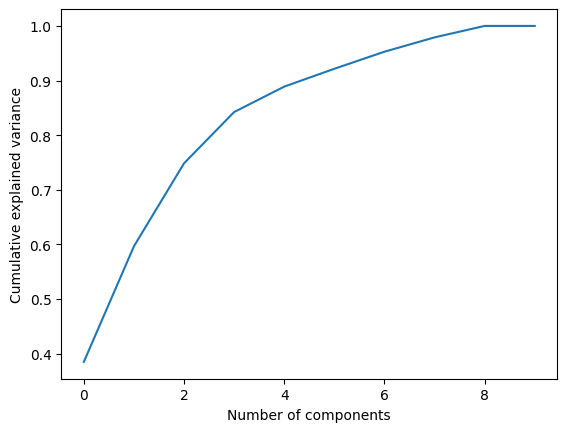

In [23]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [24]:
n_components = 8
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_poly)

In [25]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.38498037 0.21163591 0.15186858 0.093887   0.04651913 0.03266166
 0.03123867 0.02621084]


In [26]:

# create a dataframe to hold the information
df_comp = pd.DataFrame(pca.components_, columns=list(df_poly.columns))

# For each component, get the features with the largest absolute contribution
for i in range(2):
    top_features = df_comp.iloc[i].apply(np.abs).nlargest(5) #we get the abs value cuz the neg and positives have similar significance
    print(f"For component {i+1}, the top contributing features are:")
    print(top_features)
    print("\n")

For component 1, the top contributing features are:
reviews realInstalls ratings    0.803451
realInstalls                    0.387999
reviews                         0.375448
score reviews realInstalls      0.189361
score                           0.118126
Name: 0, dtype: float64


For component 2, the top contributing features are:
score reviews realInstalls      0.566303
score realInstalls              0.502764
score reviews                   0.469746
score                           0.369989
reviews realInstalls ratings    0.162321
Name: 1, dtype: float64




# clustering


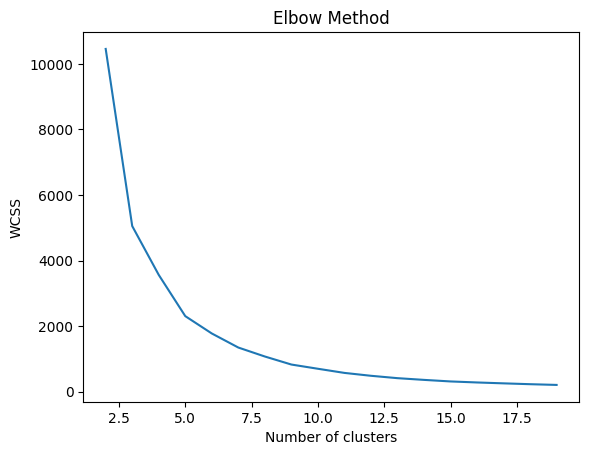

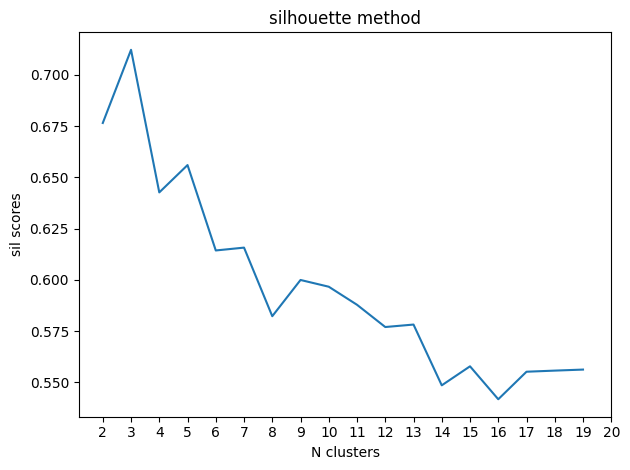

In [27]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the elbow method
wcss = []  # within cluster sum square distance
silhouette_scores=[]
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_poly[['score reviews realInstalls']])
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_poly[['score reviews realInstalls']],kmeans.labels_))
fig, ax = plt.subplots()
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.plot(range(2,20),silhouette_scores)
plt.title('silhouette method')
plt.xlabel('N clusters')
plt.ylabel('sil scores')
plt.xticks(range(2, 21))
plt.tight_layout()

plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

km=kmeans.fit(df_poly[['score reviews realInstalls']])
data['kmean']=km.labels_
d['kmean']=km.labels_

In [31]:
%pip install data-science-utils

In [ ]:
!pip install data_science_utils

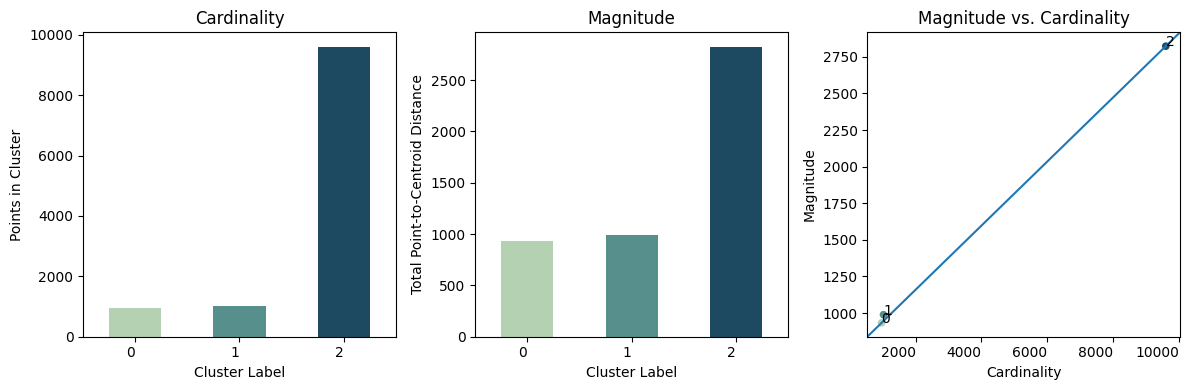

In [32]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252','black']
plot_cluster_cardinality(km.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(df_poly[['score reviews realInstalls']],
                       km.labels_,
                       km.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(df_poly[['score reviews realInstalls']],
                              km.labels_,
                              km.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km.n_clusters],
                              ax=ax3,
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

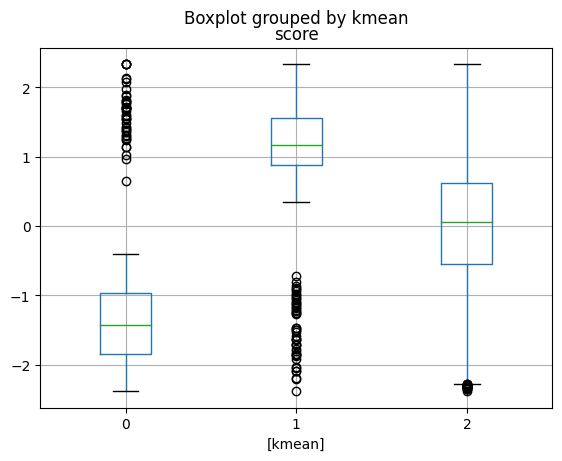

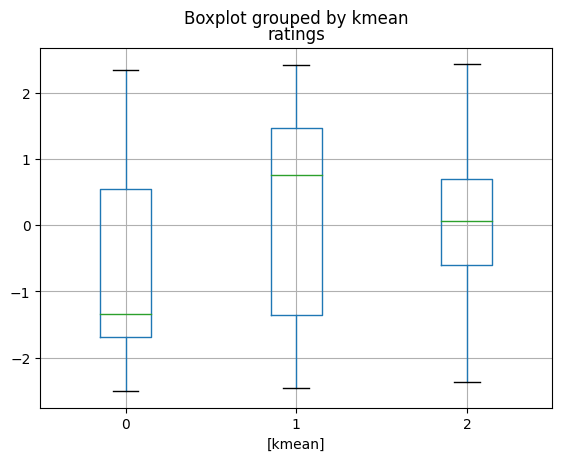

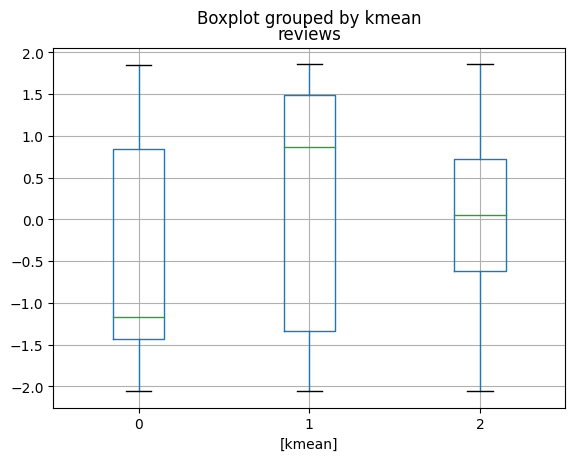

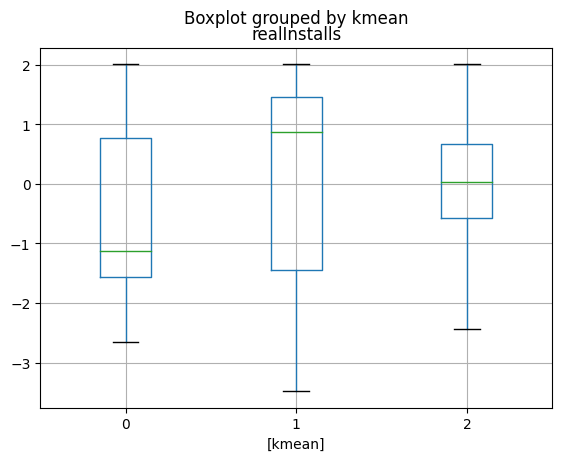

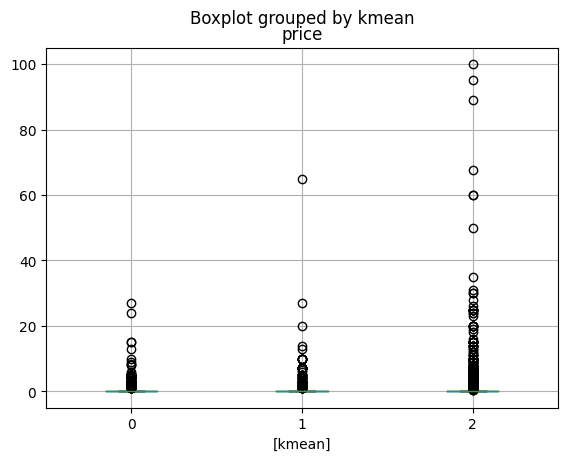

In [33]:
fig = plt.figure(figsize=(15,15))
features = ['score','ratings','reviews','realInstalls','price']
for feature in features:
  d[[feature,'kmean']].boxplot(by='kmean')